<a href="https://colab.research.google.com/github/coveymitchell/HousingPricePredictor/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/housing.csv")

In [ ]:
data.isnull().sum()

ID         0
RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

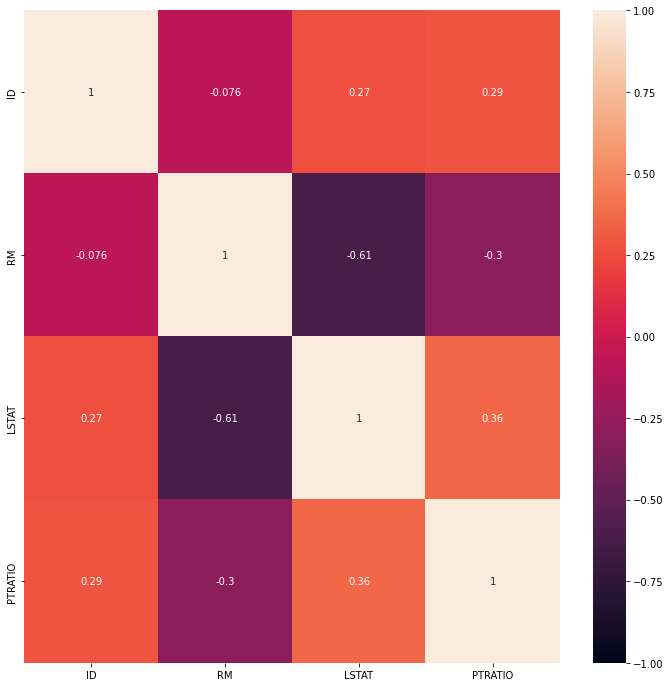

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.drop(columns=['MEDV']).corr()
plt.figure(figsize = [12,12])
sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x = data.drop(columns=['MEDV'])
x = data.drop(columns=['ID'])
y = data[['MEDV']]
scaler_x = MinMaxScaler().fit(x)
x = scaler_x.transform(x)

scaler_y = MinMaxScaler().fit(y)
y = scaler_y.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from keras.engine.sequential import Sequential
import keras
from keras import layers
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(200, activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adagrad', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 55ms/step - loss: 0.0555 - mae: 0.2022 - val_loss: 0.0447 - val_mae: 0.1834
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0550 - mae: 0.2011 - val_loss: 0.0443 - val_mae: 0.1824
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0546 - mae: 0.2002 - val_loss: 0.0439 - val_mae: 0.1815
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0541 - mae: 0.1992 - val_loss: 0.0435 - val_mae: 0.1806
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0537 - mae: 0.1983 - val_loss: 0.0432 - val_mae: 0.1797
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0533 - mae: 0.1974 - val_loss: 0.0428 - val_mae: 0.1789
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0529 - mae: 0.1966 - val_loss: 0.0425 - val_mae: 0.1781
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0525 - mae: 0.1958

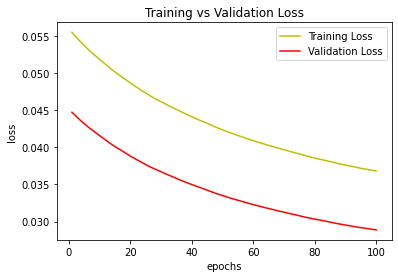

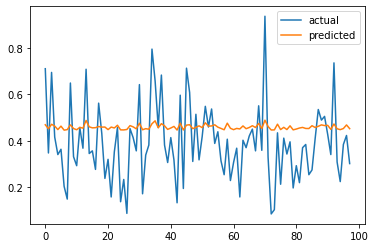

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 1+len(loss))
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
pred = model.predict(x_test)
testScore = np.sqrt(mean_squared_error(y_test, pred))
plt.plot(y_test)
plt.plot(pred)
plt.legend(['actual','predicted'],loc='upper right')
plt.show()

In [ ]:
mse = np.sum((pred - y_test)**2)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(mse)
print(rmse)

2.8290706648542066
0.16990605642153075


In [ ]:
y_pred=model.predict(x_test)
sub=pd.read_csv("/content/sample.csv")
sub['MEDV']=y_pred
sub.to_csv("submission.csv",index=False)